# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from PIL import Image
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from numpy import asarray
from matplotlib import pyplot
from mtcnn import MTCNN

# Extract Face Function

In [2]:
from os import listdir
def extract_face(filename, required_size=(200, 200)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = asarray(image)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

## Code Explanation
In this section, I defined an extract_face function that accepts the image file location as the input and extracts the face. MTCNN's detect_faces function is used to detect the face. The coordinates (x1, x2, y1, y2) make a square in which the face is present in this rectangle. The rectangle is cropped and resized based on the required_size parameter (200, 200). 

# Data Visualization

1 (200, 200, 3)
2 (200, 200, 3)
3 (200, 200, 3)
4 (200, 200, 3)
5 (200, 200, 3)
6 (200, 200, 3)
7 (200, 200, 3)
8 (200, 200, 3)
9 (200, 200, 3)
10 (200, 200, 3)
11 (200, 200, 3)
12 (200, 200, 3)
13 (200, 200, 3)
14 (200, 200, 3)
15 (200, 200, 3)
16 (200, 200, 3)
17 (200, 200, 3)
18 (200, 200, 3)
19 (200, 200, 3)
20 (200, 200, 3)


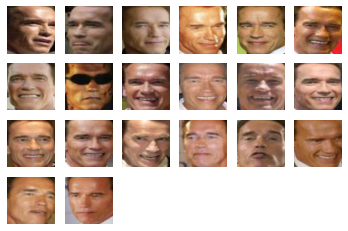

In [4]:
def check_images():
    folder = '../../final_members_30/train/arnold/'
    i = 1
    for filename in listdir(folder):
        path = folder + filename
        face = extract_face(path)
        print(i, face.shape)
        pyplot.subplot(4, 6, i)
        pyplot.axis('off')
        pyplot.imshow(face)
        i += 1
    pyplot.show()

check_images()

## Code Explanation
Here, a check is performed to see if the extract_face function is working as intended. As we can see from the plot above, the extract_face function can extract the face and resize it to 200x200.

# Data Preparation

In [5]:
def obtain_train_test_dataset(path):
    data = []
    label = []
    directorii = []
    i = 0
    for subdir, dirs, files in os.walk(path):
        if i == 0:
            directorii = dirs
        i = 1

    for i in directorii:
        img_path = os.path.join(path, str(i)) 
        print(img_path)
        for img in os.listdir(img_path):
            image = extract_face(img_path + '/' + img)
            images = image.astype('float32')
            images = np.array(images)

            data.append(images)
            label.append(i)

    data = np.array(data)
    label = np.array(label)
    return data, label

In [6]:
print("Reading train images")
x_train, y_train = obtain_train_test_dataset("../../final_members_30/train")
print("Reading test images")
x_test, y_test = obtain_train_test_dataset("../../final_members_30/val")

Reading train images
../../final_members_30/train\alejandro
../../final_members_30/train\alvaro
../../final_members_30/train\andre
../../final_members_30/train\ariel
../../final_members_30/train\arnold
../../final_members_30/train\bill
../../final_members_30/train\colin
../../final_members_30/train\david
../../final_members_30/train\dicky
../../final_members_30/train\donald
../../final_members_30/train\george
../../final_members_30/train\gerhard
../../final_members_30/train\gloria
../../final_members_30/train\guillermo
../../final_members_30/train\hans
../../final_members_30/train\hugo
../../final_members_30/train\jack
../../final_members_30/train\jacques
../../final_members_30/train\jean
../../final_members_30/train\john
../../final_members_30/train\johnn
../../final_members_30/train\jonathan
../../final_members_30/train\junichiro
../../final_members_30/train\kings
../../final_members_30/train\kofi
../../final_members_30/train\laura
../../final_members_30/train\luiz
../../final_member

In [7]:
x_train.shape

(600, 200, 200, 3)

In [8]:
y_test

array(['alejandro', 'alejandro', 'alejandro', 'alejandro', 'alejandro',
       'alvaro', 'alvaro', 'alvaro', 'alvaro', 'alvaro', 'andre', 'andre',
       'andre', 'andre', 'andre', 'ariel', 'ariel', 'ariel', 'ariel',
       'ariel', 'arnold', 'arnold', 'arnold', 'arnold', 'arnold', 'bill',
       'bill', 'bill', 'bill', 'bill', 'colin', 'colin', 'colin', 'colin',
       'colin', 'david', 'david', 'david', 'david', 'david', 'dicky',
       'dicky', 'dicky', 'dicky', 'dicky', 'donald', 'donald', 'donald',
       'donald', 'donald', 'george', 'george', 'george', 'george',
       'george', 'gerhard', 'gerhard', 'gerhard', 'gerhard', 'gerhard',
       'gloria', 'gloria', 'gloria', 'gloria', 'gloria', 'guillermo',
       'guillermo', 'guillermo', 'guillermo', 'guillermo', 'hans', 'hans',
       'hans', 'hans', 'hans', 'hugo', 'hugo', 'hugo', 'hugo', 'hugo',
       'jack', 'jack', 'jack', 'jack', 'jack', 'jacques', 'jacques',
       'jacques', 'jacques', 'jacques', 'jean', 'jean', 'jean', 'je

## Code Explanation
Here, I defined a obtain_train_test_dataset, which accepts the location of the train or test folder. In both the train and test folders, there are 30 subfolders, and the name of the subfolder is the name of the person, in which images of the person are present inside the subfolder (20 images for train and 5 images for test). 

I looped through every subfolder inside either train or test, and every image of the person to extract the face and transform them into a numpy array (using extract_face function). The numpy array is then appended into a list throughout the nested for loop, and after it is done looping, the list is transformed into a numpy array. This will be the predictor, which is stored inside x_train and x_test.

Likewise, throughout the for loop, the label variable is appended with the current subfolder name. After the loop, it is transformed into a numpy array and stored inside y_train and y_test.

In [9]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Code Explanation
Initially, both y_train and y_test contains string. I decided to one-hot encode it, but the to_categorical function by keras does not allow arrays with string. Therefore, label_encoder is used to transform y_train and y_test to contain numbers (0 to 29) before transforming them into one-hot encoded vectors.

# Model Creation (Transfer Learning)

In [11]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import GlobalAveragePooling2D
from keras_vggface.vggface import VGGFace


def get_model():
    model = Sequential()
    model.add(VGGFace(include_top=False, input_shape=(200, 200, 3), pooling='avg', model='resnet50'))
    model.add(Dropout(rate=0.25))
    model.add(keras.layers.Flatten())
    model.add(Dense(30, activation="softmax"))

    model.layers[0].trainable=False
    return model


In [12]:
def get_compiled_model():
    model = get_model()
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [13]:
get_compiled_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vggface_resnet50 (Functiona  (None, 2048)             23561152  
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten_1580 (Flatten)      (None, 2048)              0         
                                                                 
 dense_5530 (Dense)          (None, 30)                61470     
                                                                 
Total params: 23,622,622
Trainable params: 61,470
Non-trainable params: 23,561,152
_________________________________________________________________


## Code Explanation
The model is created by applying transfer learning, using VGGFace model, which is based on resnet50's architecture. The input_shape of the VGGFace layer is (200, 200, 3), as we have resized all of the images into that particular shape. Since this is a multiclass classification problem, I used softmax as the activation function of the output layer. The first layer (VGGFace) is frozen, meaning that it will not be trained.

For the loss function, categorical_crossentropy is used since this is, again, a multiclass classification. The accuracy metric is used to take note of the accuracy between the train and test dataset during the model training.

# Model Training

In [14]:
def train_model():
    model = get_compiled_model()
    
    history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))
    [loss, acc] = model.evaluate(x_test, y_test, verbose=0)

    print("Test Set Accuracy: " + str(acc))
    return model
    
model = train_model()

Epoch 1/30
10/10 [==============================] - 22s 2s/step - loss: 5.0124 - accuracy: 0.3200 - val_loss: 0.4301 - val_accuracy: 0.8800
Epoch 2/30
10/10 [==============================] - 19s 2s/step - loss: 0.3906 - accuracy: 0.8917 - val_loss: 0.0208 - val_accuracy: 0.9933
Epoch 3/30
10/10 [==============================] - 19s 2s/step - loss: 0.0433 - accuracy: 0.9850 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 4/30
10/10 [==============================] - 19s 2s/step - loss: 0.0127 - accuracy: 0.9967 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/30
10/10 [==============================] - 19s 2s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 9.3239e-04 - val_accuracy: 1.0000
Epoch 6/30
10/10 [==============================] - 20s 2s/step - loss: 0.0100 - accuracy: 0.9950 - val_loss: 3.1058e-04 - val_accuracy: 1.0000
Epoch 7/30
10/10 [==============================] - 20s 2s/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 2.9044e-04 - val_accuracy: 1.0000
Epoch 8/

In [15]:
model.save("vggface_model_30.h5")
print("model saved")

model saved


C:\Users\oswal\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


## Code Explanation
The model is trained on the x_train and y_train, with the x_train being the predictor and the y_train being the label.

# Model Testing

In [16]:
from keras.models import load_model
model = load_model('vggface_model_30.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vggface_resnet50 (Functiona  (None, 2048)             23561152  
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 flatten_1937 (Flatten)      (None, 2048)              0         
                                                                 
 dense_6772 (Dense)          (None, 30)                61470     
                                                                 
Total params: 23,622,622
Trainable params: 61,470
Non-trainable params: 23,561,152
_________________________________________________________________


In [17]:
y_test = []
i = 0
for subdir, dirs, files in os.walk("../../final_members_30/train"):
    if i == 0:
        y_test = dirs
    i = 1

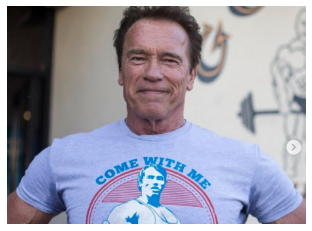

The person is: arnold


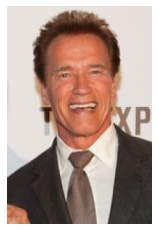

The person is: arnold


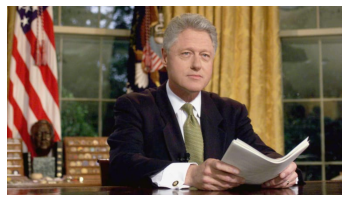

The person is: bill


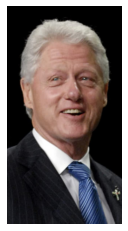

The person is: bill


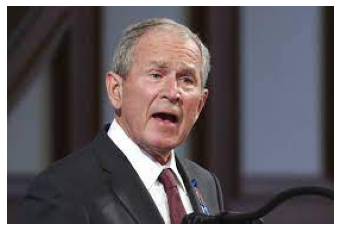

The person is: george


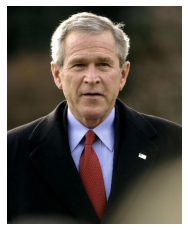

The person is: george


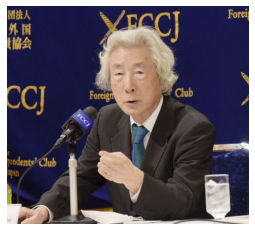

The person is: junichiro


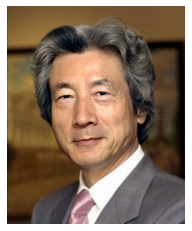

The person is: junichiro


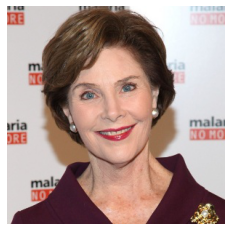

The person is: laura


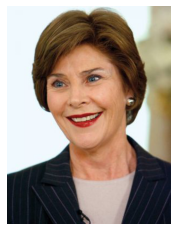

The person is: laura


In [19]:
import face_recognition
for filename in os.listdir('../../trial'):
    imageplot = face_recognition.load_image_file('../../trial/'+filename)
    pyplot.subplot(1, 1, 1)
    pyplot.axis("off")
    pyplot.imshow(imageplot)
    pyplot.show()
    
    img = open('../../trial/' + filename, 'rb')
    pixels = extract_face('../../trial/' + filename)
    hello = []
    pixels = pixels.astype('float32')
    pixels = np.array(pixels)
    hello.append(pixels)
    hello = np.array(hello)

    yhat=model.predict(hello)
    prediction_index = np.argmax(yhat, axis=None, out=None)
    prediction = y_test[prediction_index]

    print("The person is: " + prediction)

## Code Explanation
Here, the model is used to identify a person, given an image as the input. I looped through a folder and allowed the model to predict the person inside the image.